In [111]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
import seaborn as sns

In [112]:
# 데이터 로딩
file_path = "D:/AI_data/BP_data.csv"
df = pd.read_csv(file_path)

df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [113]:
df.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

#### [환자 번호, 고혈압 여부, 헤모글로빈 레벨, 가족력, 나이, BMI, 성별, 임신, 흡연 여부, 신체 활동 지수, 염분 수치, 일별 알코올 섭취, 스트레스 지수, 만성 질환, 갑상선 장애 여부]  

In [114]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [115]:
df['Pregnancy']=df['Pregnancy'].fillna(0) # Pregnancy 컬럼의 결측치를 0으로 대체
df.fillna(df.mean(), inplace=True) # 나머지 결측치는 평균값으로 대체

In [116]:
df.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [117]:
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,251.008532,2,1,1
1,2,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.000000,3,0,0
2,3,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.000000,2,1,0
3,4,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.000000,1,1,0
4,5,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.000000,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,0.0,1,26118,47568,144.000000,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,251.008532,3,1,1
1997,1998,1,16.91,0.22,18,42,0,0.0,0,14933,24753,251.008532,2,1,1
1998,1999,0,11.15,0.72,46,45,1,0.0,1,18157,15275,253.000000,3,0,1


In [118]:
# 레이블 확인
df['Blood_Pressure_Abnormality'].value_counts()

Blood_Pressure_Abnormality
0    1013
1     987
Name: count, dtype: int64

In [119]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

### countplot
##### 범주형 데이터의 개수를 세서 막대그래프로 보여줌

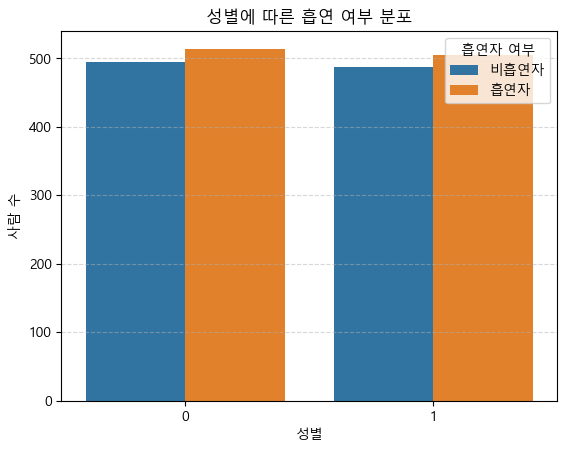

In [120]:
sns.countplot(x='Sex', hue='Smoking', data=df)

plt.title("성별에 따른 흡연 여부 분포")
plt.xlabel("성별")
plt.ylabel("사람 수")
plt.legend(title='흡연자 여부', labels=['비흡연자', '흡연자'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### boxplot
##### 범위를 나타냄

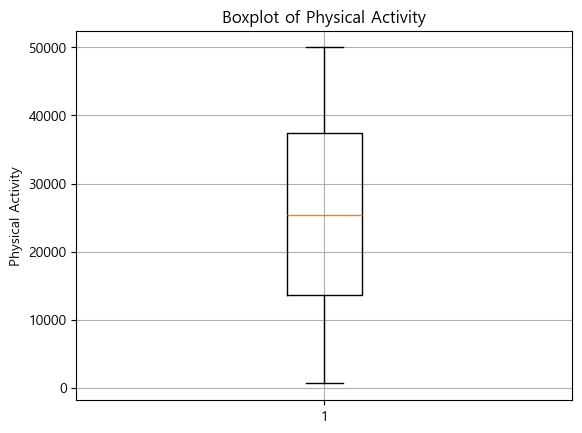

In [121]:
plt.boxplot(df['Physical_activity'])

plt.title("Boxplot of Physical Activity")
plt.ylabel("Physical Activity")
plt.grid(True)
plt.show()

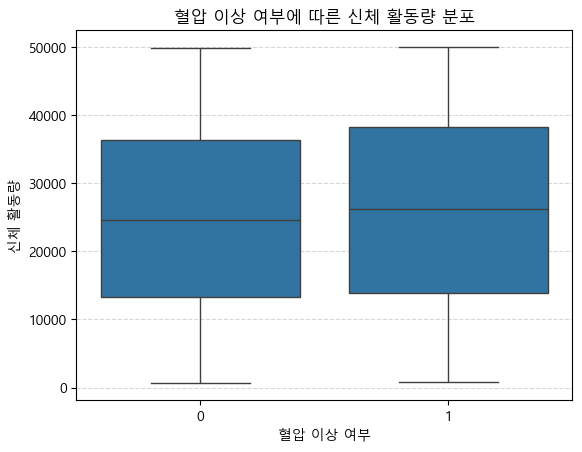

In [122]:
sns.boxplot(x='Blood_Pressure_Abnormality', y='Physical_activity', data=df)

plt.title("혈압 이상 여부에 따른 신체 활동량 분포")
plt.xlabel("혈압 이상 여부")
plt.ylabel("신체 활동량")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

### 바이올린 플롯
##### boxplot + 커널 밀도 추정(KDE)
##### 데이터의 분포를 보여주는 boxplot

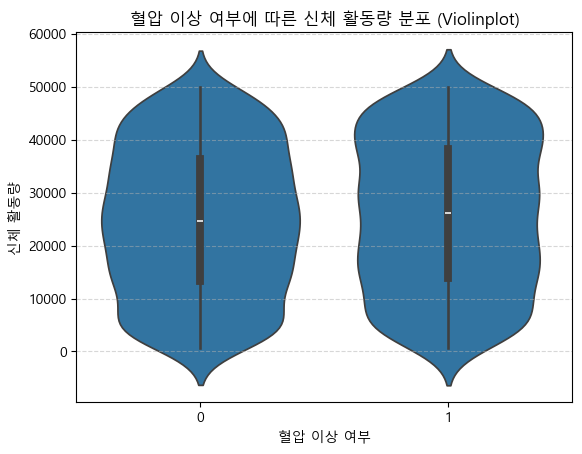

In [123]:
sns.violinplot(x='Blood_Pressure_Abnormality', y='Physical_activity', data=df)

plt.title("혈압 이상 여부에 따른 신체 활동량 분포 (Violinplot)")
plt.xlabel("혈압 이상 여부")
plt.ylabel("신체 활동량")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

### heatmap
##### 값(숫자)의 크기를 색깔로 표현한 2차원 그래프
##### 숫자가 크면 진한 색, 숫자가 작으면 연한 색
##### 데이터 간 상관관계 파악, 행렬 데이터를 시각화할 때 사용

##### 상관관계
- 두 변수 간의 관계를 수치로 나타내는 것
- +1에 가까울수록: 둘이 같이 커지고(양의 상관)
- 1에 가까울수록: 한쪽이 커지면 다른 쪽은 작아짐(음의 상관)
- 0에 가까울수록: 서로 관계가 없음(상관 없음)

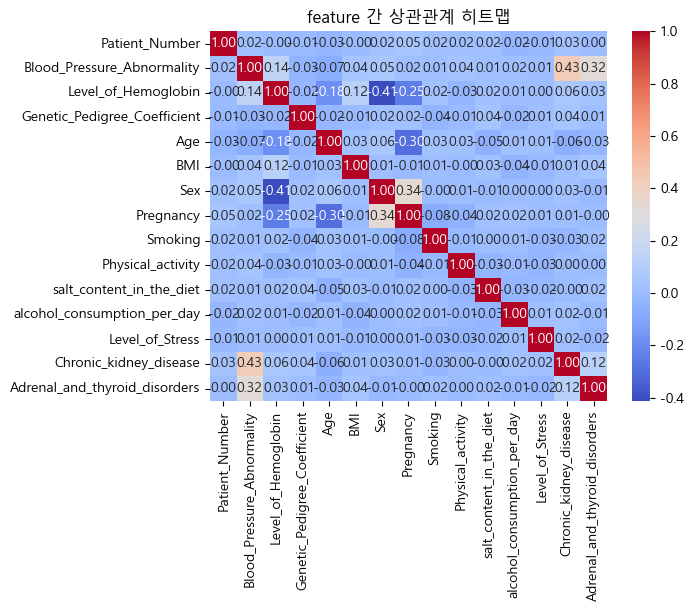

In [124]:
# 상관관계 구하기
corr = df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("feature 간 상관관계 히트맵")
plt.show()

### histogram
##### 수치형 데이터(숫자 데이터)를 구간별로 나눠서 개수를 세어 막대 그래프로 표현한 것
##### 빈도(frequency)를 막대로 보여주는 그래프
##### 히스토그램 vs 카운트플롯
- 히스토그램은 숫자들을 구간으로 나누고 그 범위마다 몇 개 있는지 세는 그래프, 수치형 데이터 분포를 볼 때 사용
- 카운트플롯은 분류된 카테고리별로 몇 개 있는지 세는 그래프, 범주형 데이터 분포를 볼 때 사용

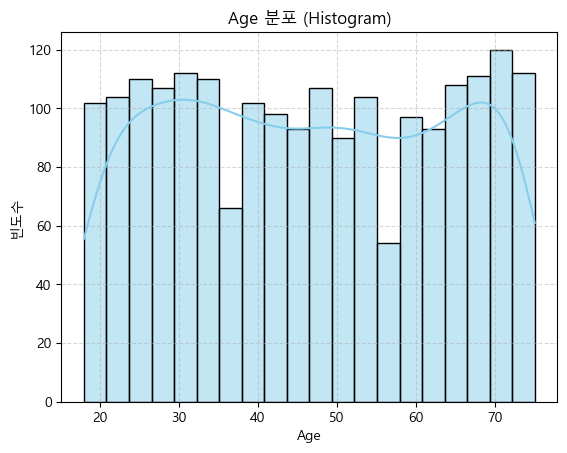

In [125]:
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue') # kde=True -> 밀도곡선을 표시 

plt.title("Age 분포 (Histogram)")
plt.xlabel("Age")
plt.ylabel("빈도수")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

### lineplot
##### x축 순서에 따라 y값의 변화를 선으로 연결해 보여주는 그래프
##### 순서나 흐름이 중요할 때 lineplot 사용 (시간에 따른 변화, 나이에 따른 변화 등)
##### 신뢰 구간
- 데이터의 평균 추정치가 어느 정도 변동할 수 있는지를 보여주는 범위
- 메인 선 주변을 둘러싸고 있는 흐릿한 띠
- 띠가 좁으면 평균값이 꽤 신뢰할 수 있다는 뜻 (데이터 변동이 작음)

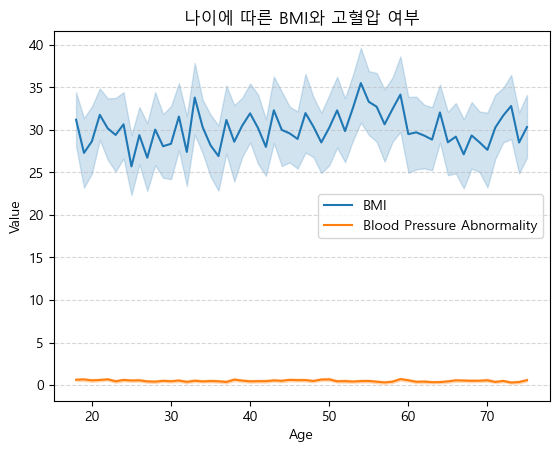

In [126]:
sns.lineplot(x='Age', y='BMI', data=df, label='BMI')
sns.lineplot(x='Age', y='Blood_Pressure_Abnormality', data=df, label='Blood Pressure Abnormality')

plt.title('나이에 따른 BMI와 고혈압 여부')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

### scatter plot (산점도)
##### 두 개의 수치형 변수 간의 관계를 점(point)으로 표현하는 그래프

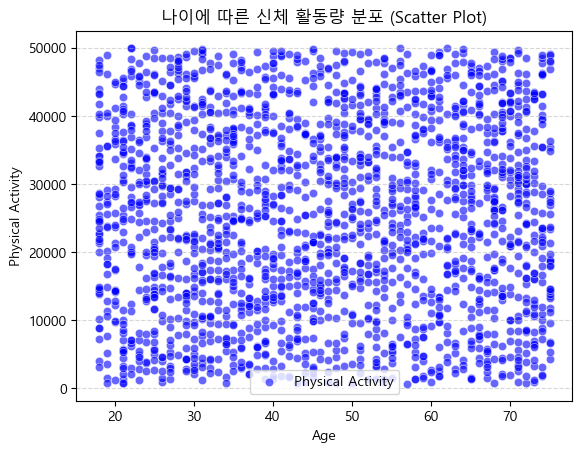

In [127]:
sns.scatterplot(x='Age', y='Physical_activity', data=df, color='blue', alpha=0.6, label='Physical Activity')

plt.title('나이에 따른 신체 활동량 분포 (Scatter Plot)')
plt.xlabel('Age')
plt.ylabel('Physical Activity')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [128]:
# 데이터 분할, 넘파이로 변환
X = df.drop('Blood_Pressure_Abnormality', axis=1).values
y = df['Blood_Pressure_Abnormality'].values

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 14), (400, 14), (1600,), (400,))

In [131]:
# numpy 배열을 pytorch tensor로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # BCEWithLogitsLoss 사용할 경우 출력 shape을 [batch_size, 1]로 맞춰줘야 하며, 정답 레이블도 float32여야 함
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [132]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True) # 데이터를 작은 묶음(batch)로 나누어 모델에 전달

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [133]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 14]),
 torch.Size([400, 14]),
 torch.Size([1600, 1]),
 torch.Size([400, 1]))

In [134]:
# 모델 정의
class BPModel(nn.Module):
    def __init__(self):
        super(BPModel, self).__init__()
        self.fc1 = nn.Linear(14, 64) # fc: fully Connected (완전연결층)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = BPModel()

In [135]:
# 손실 함수 및 최적화 기법 정의
criterion = nn.BCEWithLogitsLoss() # 이진 분류
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [136]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train() # 학습
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()  # 이전 그래디언트 초기화

        # Forward pass
        outputs = model(inputs) # 모델에 데이터 통과시켜 예측
        loss = criterion(outputs, labels) # 손실 계산

        # Backward pass and optimize
        loss.backward()
        optimizer.step() # 가중치 업데이트

        running_loss += loss.item()

    # 평균 손실 저장
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval() # 평가
    correct = 0
    total = 0
    with torch.no_grad(): # 그래디언트 계산 생략, 더 빠름
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            predicted = torch.sigmoid(outputs)  # sigmoid: 로짓을 0~1 사이의 확률로 바꿈 (이진 분류일 때)
            predicted = (predicted >= 0.5).float()  # 예측값이 0.5 이상이면 1, 아니면 0
            # _, predicted = torch.max(outputs.data, 1) # 가장 높은 확률을 갖는 클래스를 예측으로 선택 (다중 분류일 때)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total # 정확도 = 정답 / 전체
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.6595, Accuracy: 72.00%
Epoch 2/20, Loss: 0.5632, Accuracy: 73.50%
Epoch 3/20, Loss: 0.5112, Accuracy: 76.75%
Epoch 4/20, Loss: 0.4814, Accuracy: 80.25%
Epoch 5/20, Loss: 0.4501, Accuracy: 82.50%
Epoch 6/20, Loss: 0.4172, Accuracy: 83.75%
Epoch 7/20, Loss: 0.3863, Accuracy: 85.75%
Epoch 8/20, Loss: 0.3600, Accuracy: 86.75%
Epoch 9/20, Loss: 0.3346, Accuracy: 88.50%
Epoch 10/20, Loss: 0.3180, Accuracy: 88.50%
Epoch 11/20, Loss: 0.3037, Accuracy: 88.00%
Epoch 12/20, Loss: 0.2926, Accuracy: 89.00%
Epoch 13/20, Loss: 0.2838, Accuracy: 89.00%
Epoch 14/20, Loss: 0.2785, Accuracy: 89.50%
Epoch 15/20, Loss: 0.2700, Accuracy: 88.75%
Epoch 16/20, Loss: 0.2674, Accuracy: 89.25%
Epoch 17/20, Loss: 0.2649, Accuracy: 88.75%
Epoch 18/20, Loss: 0.2584, Accuracy: 88.50%
Epoch 19/20, Loss: 0.2526, Accuracy: 89.00%
Epoch 20/20, Loss: 0.2482, Accuracy: 88.25%
Training complete.


In [137]:
# 모델 평가
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        predicted = torch.sigmoid(outputs)
        predicted = (predicted >= 0.5).float()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[184  24]
 [ 23 169]]
F1 Score: 0.88
Precision: 0.88
Recall: 0.88
Specificity: 0.88


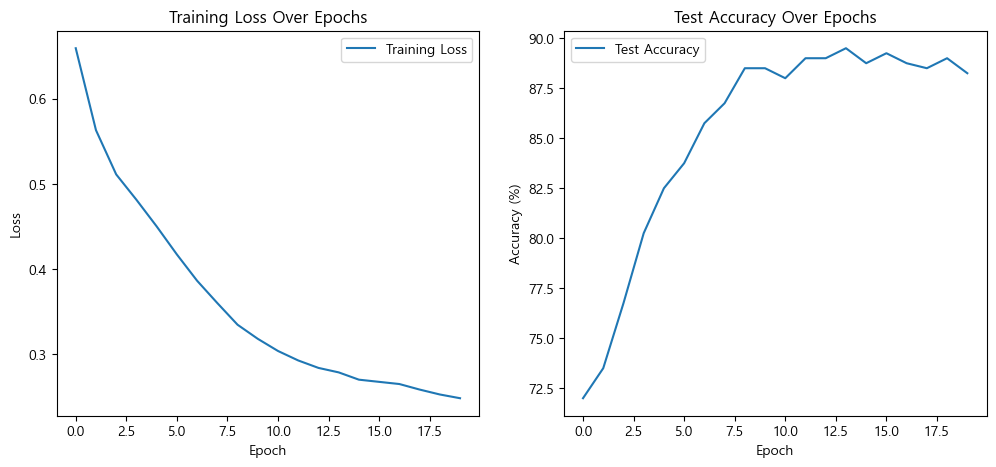

In [138]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()